In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import re
import random
from rhg import *
from shortest_path_finder import *
from figure_utility import *
from EXPERIMENT import read

%load_ext autoreload
%autoreload 2

In [3]:
plt.rcParams.update({
    'font.size': 12,
    'font.family': 'serif',
    'axes.titlesize': 18,
    'axes.titleweight': 'bold',
    'axes.labelsize': 14,
    'axes.labelweight': 'semibold',
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.titlesize': 20,
    'axes.grid': True,
    'grid.alpha': 0.7,
    'grid.linestyle': '--',
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.linewidth': 1.2,
    'xtick.major.width': 1.2,
    'ytick.major.width': 1.2,
    'xtick.minor.width': 0.8,
    'ytick.minor.width': 0.8,
})

# Network 1

## plain dijkstra

In [15]:
path = "./results/network1_overlap_dijkstra_results_6.25.txt"
add_paths = ["./results/network1_overlap_dijkstra_results_10_10_6.26.txt"]
ps, overlaps = read(path, add_paths)

Additional result in ['./results/network1_overlap_dijkstra_results_10_10_6.26.txt']


Text(0.5, 1.0, 'plain dijkstra')

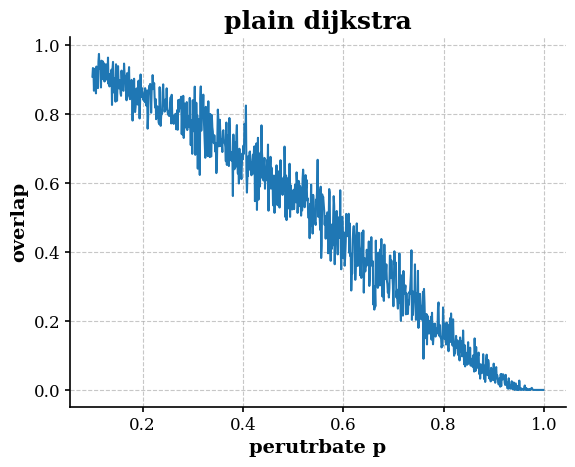

In [16]:
fig, ax = plt.subplots()
ax.plot(ps, overlaps)
ax.set_xlabel("perutrbate p")
ax.set_ylabel("overlap")
ax.set_title("plain dijkstra")

## distance to geodesic

In [14]:
path = "./results/network1_overlap_hgd_results_6.25.txt"
ps, overlaps = read(path)

In [11]:
print(f"With real hyperlbolic coordinates, the overlap should not be affect by perturbate, the mean overlap is {np.mean(overlaps)}")

With real hyperlbolic coordinates, the overlap should not be affect by perturbate, the mean overlap is 0.5131555244444445


Text(0.5, 1.0, 'distance to geodesic')

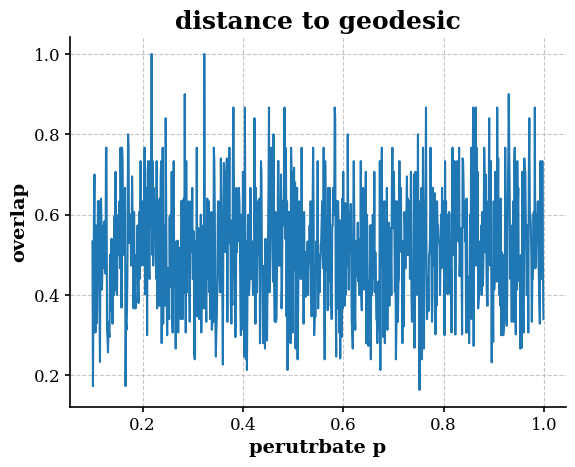

In [10]:
fig, ax = plt.subplots()
ax.plot(ps, overlaps)
ax.set_xlabel("perutrbate p")
ax.set_ylabel("overlap")
ax.set_title("distance to geodesic")

# n=500 rhg A1

In [ ]:
path = "./results/testA1_overlap_dijkstra_results_10_10_6.30.txt"
# add_paths = ["./results/testA1_overlap_perturbate_hgd_results_5_5_6.27.txt"]
ps_0, overlaps_0 = read(path)

In [26]:
path = "./results/testA1_overlap_perturbate_hgd_results_1_1_6.27.txt"
add_paths = ["./results/testA1_overlap_perturbate_hgd_results_5_5_6.27.txt"]
ps_1, overlaps_1 = read(path, add_paths)

Additional result in ['./results/testA1_overlap_perturbate_hgd_results_5_5_6.27.txt']


Text(0.5, 1.0, 'distance to geodesic, hyperlink with perturbated network')

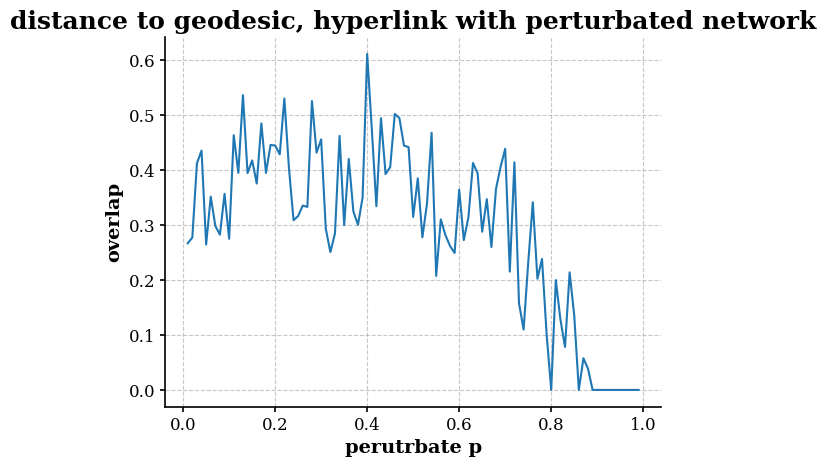

In [21]:
fig, ax = plt.subplots()
ax.plot(ps, overlaps)
ax.set_xlabel("perutrbate p")
ax.set_ylabel("overlap")
ax.set_title("distance to geodesic, hyperlink with perturbated network")

In [4]:
path = "./results/testA1_overlap_perturbate_hp_dijkstra_results_5_5_6.28.txt"
add_paths = ["./results/testA1_overlap_perturbate_hp_dijkstra_results_10_10_6.28.txt"]
ps_2, overlaps_2 = read(path)

Text(0.5, 1.0, 'dijkstra on weighted network, hyperlink with perturbated network')

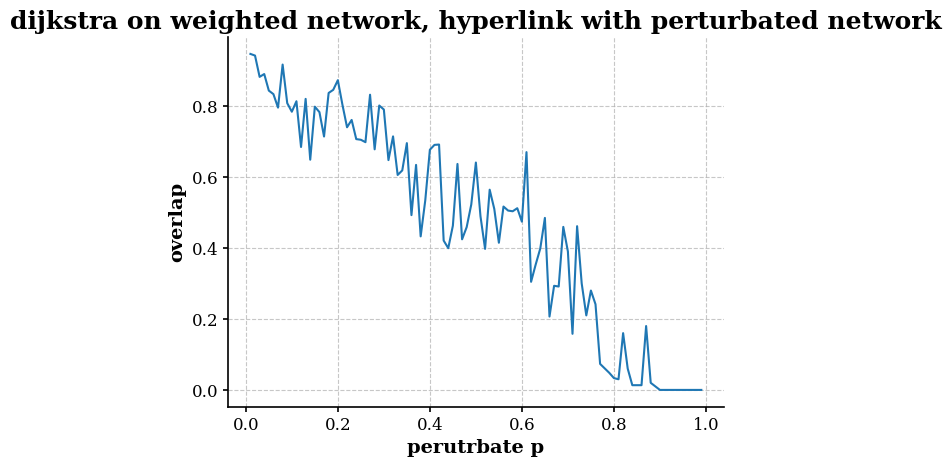

In [5]:
fig, ax = plt.subplots()
ax.plot(ps_2, overlaps_2)
ax.set_xlabel("perutrbate p")
ax.set_ylabel("overlap")
ax.set_title("dijkstra on weighted network, hyperlink with perturbated network")

In [52]:
method = "all"
metric = "all"
shortest_path_times = 20
perturbation_times = 5
path = f"./results/testA1_{metric}_{method}_results_{shortest_path_times}_{perturbation_times}_7.2.txt"
ps, overlaps, edit_distances = read(path, method=method, metric=metric)

In [42]:
overlap_index_error = np.where(overlaps[:, 0]==-1)
overlaps[overlap_index_error, :] = 0

In [43]:
edit_index_error = np.where(edit_distances[:, 0]==-1)
edit_distances[edit_index_error, :] = 0

In [44]:
print(edit_distances)

[[0.976      0.5433336  0.9866664 ]
 [0.9942856  0.7226668  0.9213328 ]
 [0.9866668  0.596      0.958666  ]
 [0.9782856  0.7033336  0.944762  ]
 [0.9666664  0.6080004  0.9573328 ]
 [1.         0.6793336  0.9799996 ]
 [0.987      0.7305716  0.8725712 ]
 [0.9942856  0.6653328  0.8813332 ]
 [0.9701112  0.649428   0.9146032 ]
 [0.9691428  0.713334   0.8422848 ]
 [0.9374288  0.6773332  0.8998096 ]
 [0.9535232  0.6520004  0.9173328 ]
 [0.890476   0.688      0.9373332 ]
 [0.9331428  0.5582224  0.8431104 ]
 [0.9382544  0.5978572  0.8519052 ]
 [0.9219048  0.572      0.86      ]
 [0.9695236  0.5693336  0.8373332 ]
 [0.930952   0.6926672  0.870666  ]
 [0.911476   0.6526676  0.9159992 ]
 [0.9165868  0.6163816  0.8683808 ]
 [0.8771432  0.5720008  0.8415232 ]
 [0.8969528  0.6666668  0.842666  ]
 [0.9184124  0.6526668  0.7995236 ]
 [0.8925556  0.5948572  0.8141428 ]
 [0.9431112  0.7067936  0.837206  ]
 [0.8681556  0.5113332  0.7926664 ]
 [0.8539052  0.596      0.8901908 ]
 [0.8638648  0.5608488  0.79

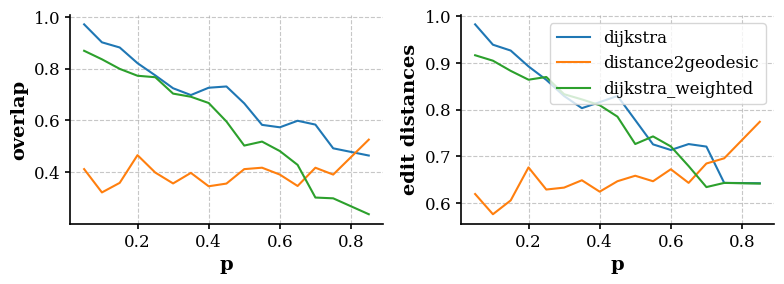

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].plot(ps, overlaps[:, 0], label="dijkstra")
axes[0].plot(ps, overlaps[:, 1], label="distance2geodesic")
axes[0].plot(ps, overlaps[:, 2], label="dijkstra_weighted")
# axes[0].scatter(ps[overlap_index_error], np.zeros(np.size(overlap_index_error)), s=10, marker='X', label="error")
axes[0].set_xlabel("p")
axes[0].set_ylabel("overlap")
axes[0].set_title("")
# axes[0].legend()

axes[1].plot(ps, edit_distances[:, 0], label="dijkstra")
axes[1].plot(ps, edit_distances[:, 1], label="distance2geodesic")
axes[1].plot(ps, edit_distances[:, 2], label="dijkstra_weighted")
# axes[1].scatter(ps[edit_index_error], np.zeros(np.size(edit_index_error)), s=10, marker='X', label="error")
axes[1].set_xlabel("p")
axes[1].set_ylabel("edit distances")
axes[1].set_title("")
axes[1].legend()
save_path = "./figure/exp.pdf"
plt.tight_layout()
plt.savefig(save_path)

In [51]:
np.size(np.arange(0.05, 1, 0.05))

19